<h2>1. Import libraries<h2>

In [2]:
!pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 894.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=caa629bff322e6f10fa017243d4b7071aabd6f7ec4784efc608df15cdc709657
  Stored in directory: /Users/toshiniagrawal/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [4]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 513.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.9
    Uninstalling urllib3-1.26.9:
      Successfully uninstalled urllib3-1.26.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
selenium 4.1.3 requires urllib3[secure,socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from scipy import stats
import scipy as sp
import random


# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.model_selection import train_test_split

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# import SVM
from sklearn import svm

import folium # map rendering library

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import webbrowser
from folium import plugins
%matplotlib inline




print("Libraries imported.")

Libraries imported.


<h2>2. Load data from CSV file<h2>

In [3]:
df = pd.read_csv("/Users/toshiniagrawal/Desktop/Data-Collisions.csv")

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.shape

(194673, 38)

In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

#### Let's see how many severity codes there are

1 - Property damage only collision

2 - Injury collision

In [7]:
df['SEVERITYCODE'].value_counts(normalize = True)

1    0.701099
2    0.298901
Name: SEVERITYCODE, dtype: float64

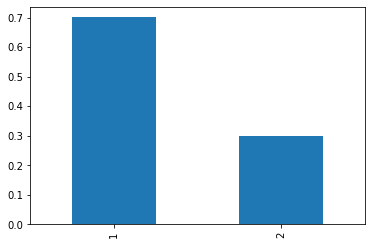

In [8]:
df['SEVERITYCODE'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

We now have a baseline for the rate of accidents which include injury. For purposes of discussion, we will say that 70% of the accidents result in only property damage, while roughly 30% result in injury.

We can use this baseline to compare normalized rates of various conditions.


<h2>3. Data Cleaning<h2>
    
See if there is any NaN

In [9]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

### Junction Types

In [11]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [12]:
# Replace NaN with "Unknown"
df['JUNCTIONTYPE'].replace(np.nan, 'Unknown', inplace=True)

In [13]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
Unknown                                               6338
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Name: JUNCTIONTYPE, dtype: int64

In [14]:
df_junctiontype = df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts()
df_junctiontype

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1                1475
                                                   2                 623
At Intersection (intersection related)             1               35636
                                                   2               27174
Driveway Junction                                  1                7437
                                                   2                3234
Mid-Block (but intersection related)               1               15493
                                                   2                7297
Mid-Block (not related to intersection)            1               70396
                                                   2               19404
Ramp Junction                                      1                 112
                                                   2                  54
Unknown                                            1        

<function matplotlib.pyplot.show(close=None, block=None)>

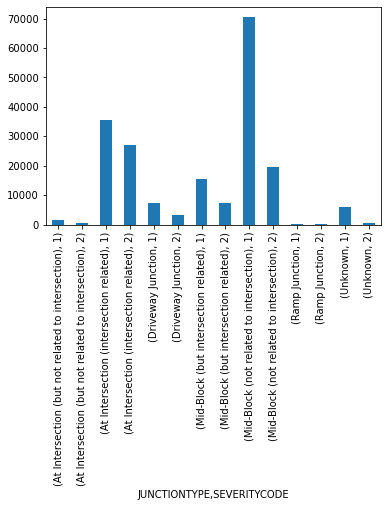

In [15]:
df_junctiontype.plot(kind = 'bar')
plt.show

In [16]:
df_junctiontype_norm = df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize = True)
df_junctiontype_norm

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.703051
                                                   2               0.296949
At Intersection (intersection related)             1               0.567362
                                                   2               0.432638
Driveway Junction                                  1               0.696936
                                                   2               0.303064
Mid-Block (but intersection related)               1               0.679816
                                                   2               0.320184
Mid-Block (not related to intersection)            1               0.783920
                                                   2               0.216080
Ramp Junction                                      1               0.674699
                                                   2               0.325301
Unknown                 

<function matplotlib.pyplot.show(close=None, block=None)>

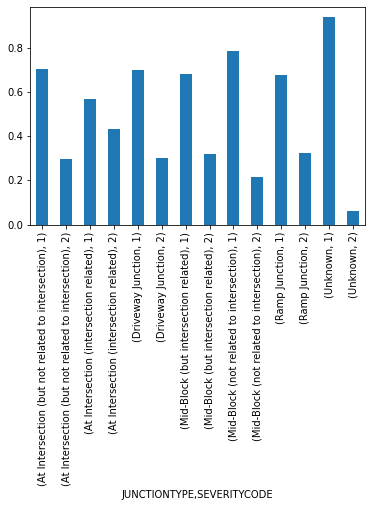

In [17]:
df_junctiontype_norm.plot(kind = 'bar')
plt.show

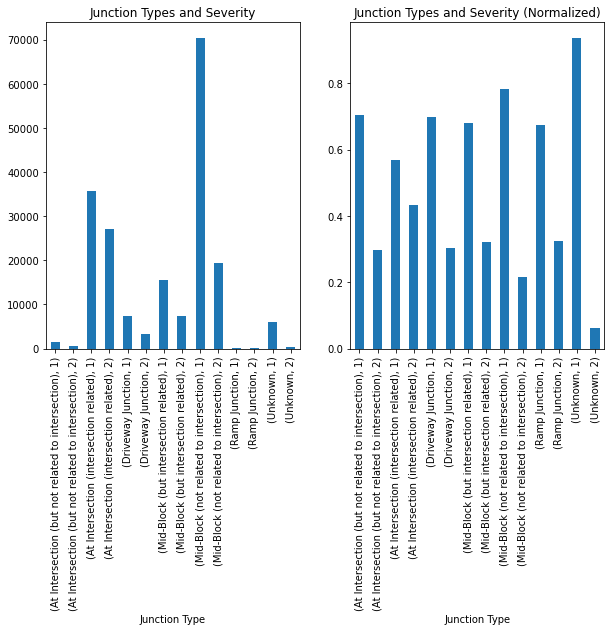

In [18]:
fig_junctiontype = plt.figure() # create figure

ax_junc = fig_junctiontype.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_junc_norm = fig_junctiontype.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


df_junctiontype.plot(kind='bar', figsize = (10,6), ax=ax_junc) # add to subplot 1
ax_junc.set_title('Junction Types and Severity')
ax_junc.set_xlabel('Junction Type')



df_junctiontype_norm.plot(kind='bar', figsize = (10,6), ax=ax_junc_norm) # add to subplot 1
ax_junc_norm.set_title('Junction Types and Severity (Normalized)')
ax_junc_norm.set_xlabel('Junction Type')

plt.show()

<AxesSubplot:xlabel='JUNCTIONTYPE', ylabel='count'>

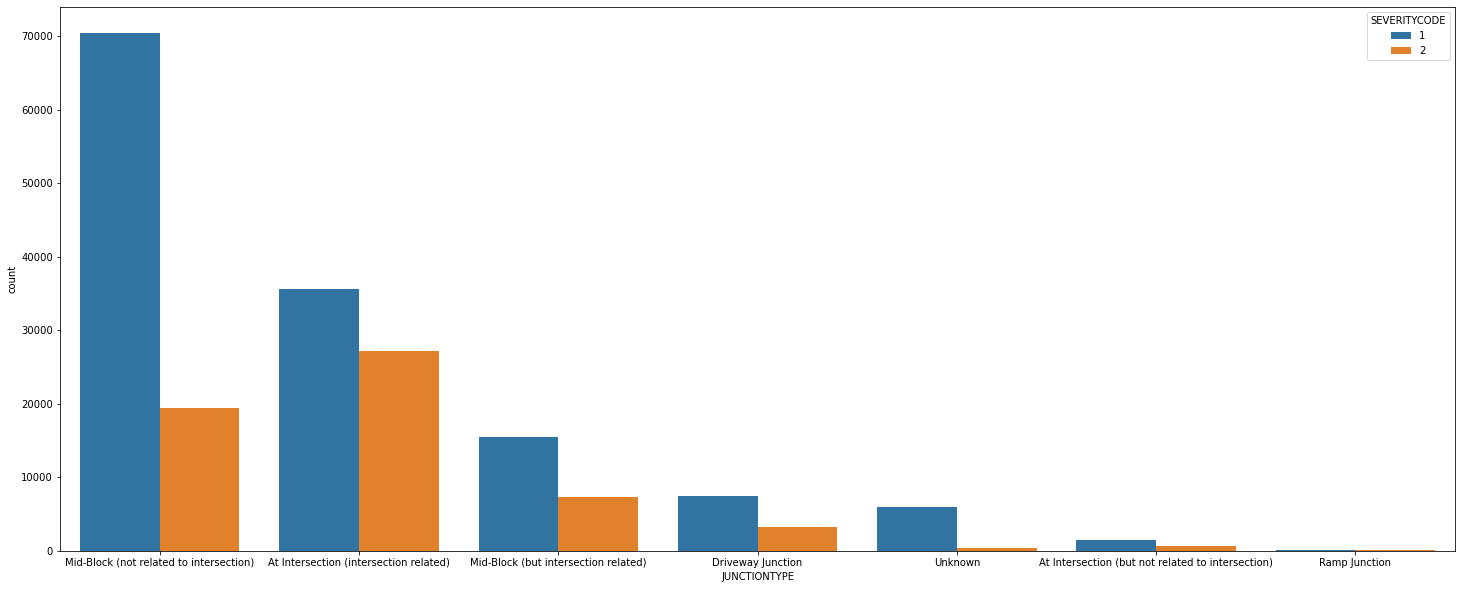

In [19]:
f, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x='JUNCTIONTYPE', hue='SEVERITYCODE',data=df,order=df['JUNCTIONTYPE'].value_counts().index)

The majority of accidents occur at mid-block (not related to intersection). However, more injury collision occur at intersection (intersection related).  

### Light Conditions

In [20]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [21]:
# Replace NaN with "Unknown"
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace=True)
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      18643
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [22]:
df_light = df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts()
df_light

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1                1203
                          2                 334
Dark - Street Lights Off  1                 883
                          2                 316
Dark - Street Lights On   1               34032
                          2               14475
Dark - Unknown Lighting   1                   7
                          2                   4
Dawn                      1                1678
                          2                 824
Daylight                  1               77593
                          2               38544
Dusk                      1                3958
                          2                1944
Other                     1                 183
                          2                  52
Unknown                   1               16948
                          2                1695
Name: SEVERITYCODE, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

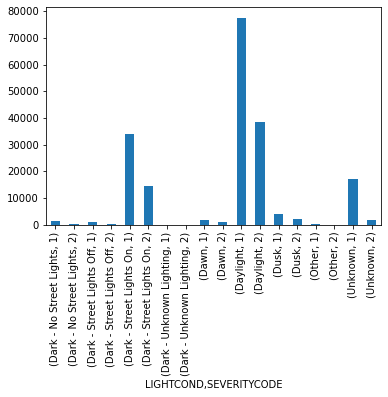

In [23]:
df_light.plot(kind = 'bar')
plt.show

In [24]:
df_light_norm = df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize = True)
df_light_norm

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.909081
                          2               0.090919
Name: SEVERITYCODE, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

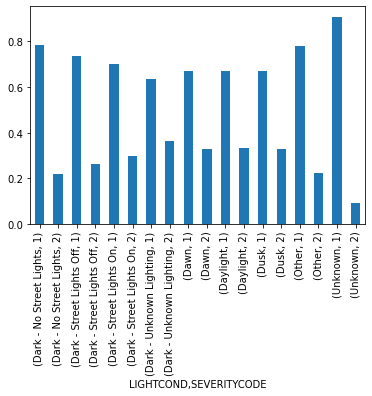

In [25]:
df_light_norm.plot(kind = 'bar')
plt.show

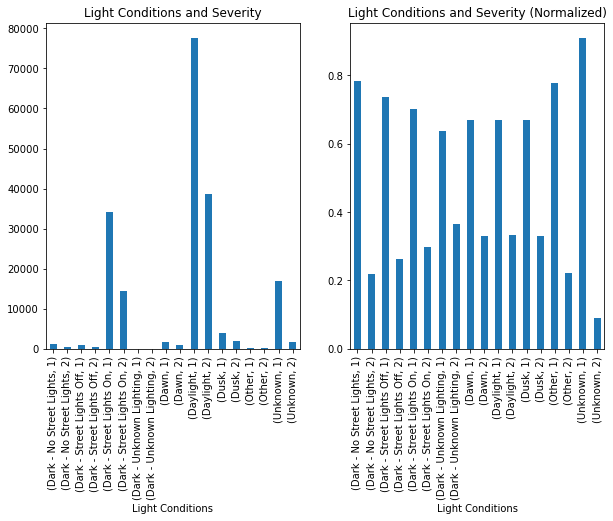

In [26]:
fig_light = plt.figure() # create figure

ax_light = fig_light.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_light_norm = fig_light.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


df_light.plot(kind='bar', figsize = (10,6), ax=ax_light) # add to subplot 1
ax_light.set_title('Light Conditions and Severity')
ax_light.set_xlabel('Light Conditions')



df_light_norm.plot(kind='bar', figsize = (10,6), ax=ax_light_norm) # add to subplot 1
ax_light_norm.set_title('Light Conditions and Severity (Normalized)')
ax_light_norm.set_xlabel('Light Conditions')

plt.show()

<AxesSubplot:xlabel='LIGHTCOND', ylabel='count'>

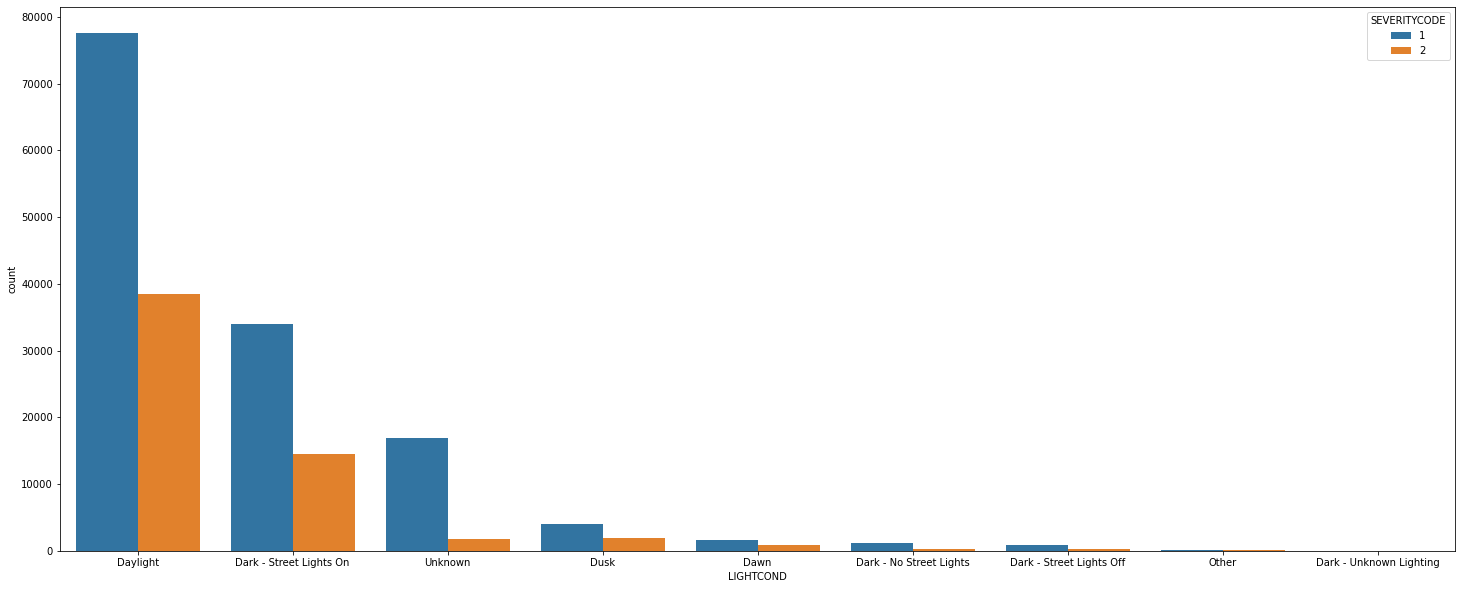

In [27]:
f, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x='LIGHTCOND', hue='SEVERITYCODE',data=df,order=df['LIGHTCOND'].value_counts().index)

The majority of accidents occur in Daylight, and Dark - Street Lights On.
Lighting conditions appear to generally follow the base rate with some variance.

### Collision Types

In [28]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [29]:
# Replace NaN with "Unknown"
df['COLLISIONTYPE'].replace(np.nan, 'Unknown', inplace=True)
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Unknown        4904
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [30]:
df_collision = df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts()
df_collision

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
               2               13624
Cycles         2                4744
               1                 671
Head On        1                1152
               2                 872
Left Turn      1                8292
               2                5411
Other          1               17591
               2                6112
Parked Car     1               45325
               2                2662
Pedestrian     2                5936
               1                 672
Rear Ended     1               19419
               2               14671
Right Turn     1                2347
               2                 609
Sideswipe      1               16103
               2                2506
Unknown        1                3863
               2                1041
Name: SEVERITYCODE, dtype: int64

In [31]:
df_collision_norm = df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize = True)
df_collision_norm

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2               0.898305
               1               0.101695
Rear Ended     1               0.569639
               2               0.430361
Right Turn     1               0.793978
               2               0.206022
Sideswipe      1               0.865334
               2               0.134666
Unknown        1               0.787724
               2               0.212276
Name: SEVERITYCODE, dtype: float64

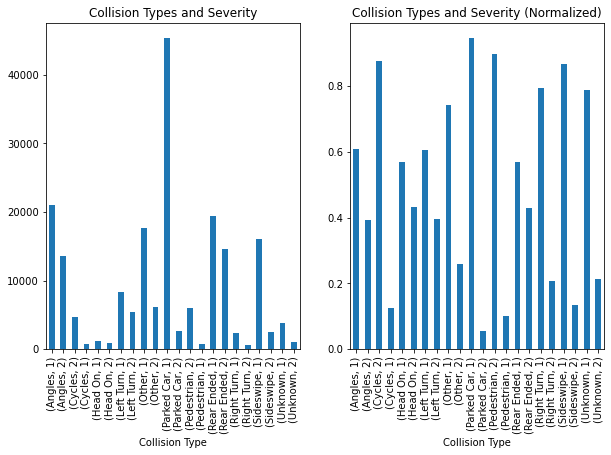

In [32]:
fig_collision = plt.figure() # create figure

ax_coll = fig_collision.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_coll_norm = fig_collision.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


df_collision.plot(kind='bar', figsize = (10,6), ax=ax_coll) # add to subplot 1
ax_coll.set_title('Collision Types and Severity')
ax_coll.set_xlabel('Collision Type')



df_collision_norm.plot(kind='bar', figsize = (10,6), ax=ax_coll_norm) # add to subplot 1
ax_coll_norm.set_title('Collision Types and Severity (Normalized)')
ax_coll_norm.set_xlabel('Collision Type')

plt.show()

<AxesSubplot:xlabel='COLLISIONTYPE', ylabel='count'>

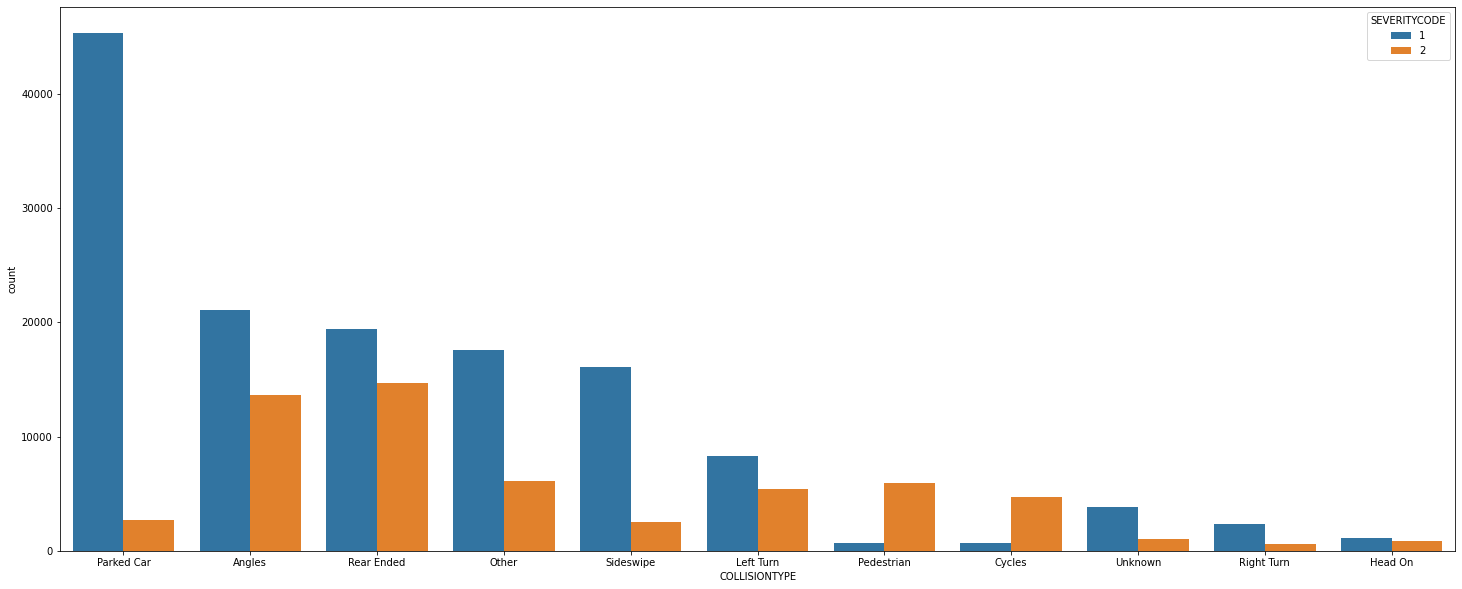

In [33]:
f, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE',data=df,order=df['COLLISIONTYPE'].value_counts().index)

There appear to be a few collision types which have a disproportionate result:

Angles - 39.3% injury

Head on - 43.1% injury

Parked car - 94.5% property damage only

Pedestrian - 89.9% injury

Cycles - 87.6% injury

The type of collision appears to have a significant impact on the likelihood of injury.

### Weather

In [34]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [35]:
# Replace NaN with "Unknown"
df['WEATHER'].replace(np.nan, 'Unknown', inplace=True)
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      20172
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [36]:
df_weather = df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()
df_weather

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  41
                          2                  15
Clear                     1               75295
                          2               35840
Fog/Smog/Smoke            1                 382
                          2                 187
Other                     1                 716
                          2                 116
Overcast                  1               18969
                          2                8745
Partly Cloudy             2                   3
                          1                   2
Raining                   1               21969
                          2               11176
Severe Crosswind          1                  18
                          2                   7
Sleet/Hail/Freezing Rain  1                  85
                          2                  28
Snowing                   1                 736
                          2                 171
U

In [37]:
df_weather_norm = df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize = True)
df_weather_norm

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

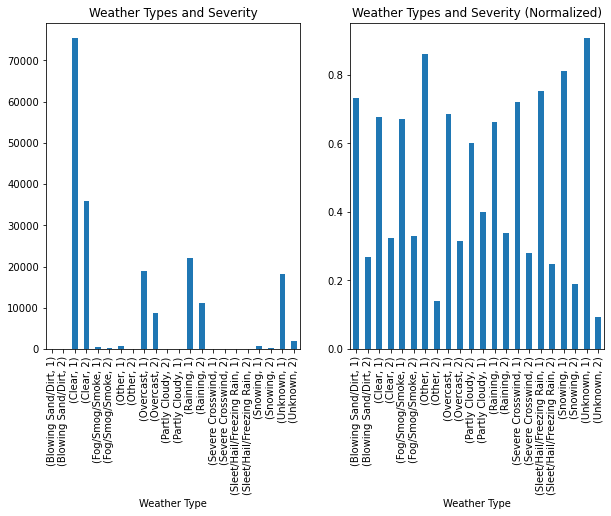

In [38]:
fig_weather = plt.figure() # create figure

ax_weather = fig_weather.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_weather_norm = fig_weather.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**


df_weather.plot(kind='bar', figsize = (10,6), ax=ax_weather) # add to subplot 1
ax_weather.set_title('Weather Types and Severity')
ax_weather.set_xlabel('Weather Type')



df_weather_norm.plot(kind='bar', figsize = (10,6), ax=ax_weather_norm) # add to subplot 1
ax_weather_norm.set_title('Weather Types and Severity (Normalized)')
ax_weather_norm.set_xlabel('Weather Type')

plt.show()

<AxesSubplot:xlabel='WEATHER', ylabel='count'>

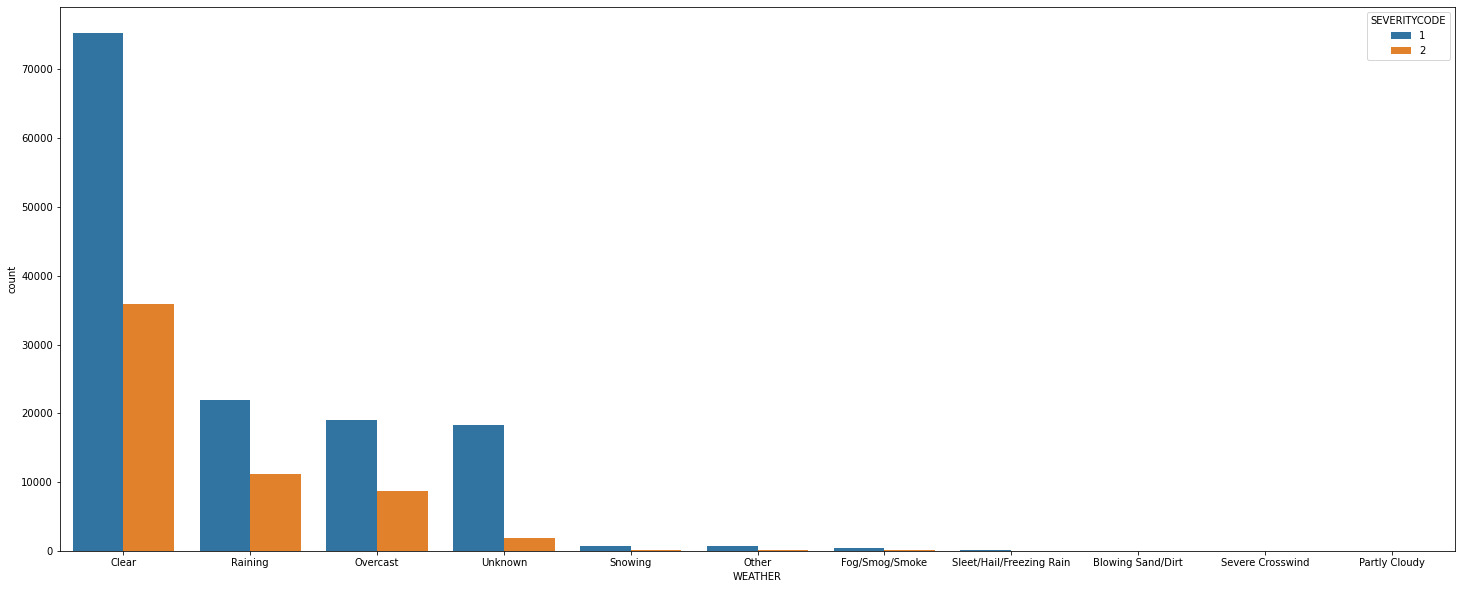

In [39]:
f, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x='WEATHER', hue='SEVERITYCODE',data=df,order=df['WEATHER'].value_counts().index)

Most weather instances are Clear, Raining, Overcast.

All of these have a slightly higher percentage of injury. I initially found it surprising that adverse weather conditions did not result in greater injury. Perhaps this is due to more alert, careful driving in adverse conditions.

I was initially surprised to see that </i> Partly Cloudy had a 60% rate of personal injury, but with only 5 instances, the sample size is too small to really draw any meaningful conclusions.

### Speeding

Whether or not speeding was a factor in the collision. (Y/N)

In [40]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [41]:
# Replace NaN with "N"
df['SPEEDING'].replace(np.nan, 'N', inplace=True)
df['SPEEDING'].value_counts()

N    185340
Y      9333
Name: SPEEDING, dtype: int64

In [42]:
df_speed = df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts()
df_speed

SPEEDING  SEVERITYCODE
N         1               130683
          2                54657
Y         1                 5802
          2                 3531
Name: SEVERITYCODE, dtype: int64

In [43]:
df_speed_norm = df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize = True)
df_speed_norm

SPEEDING  SEVERITYCODE
N         1               0.705099
          2               0.294901
Y         1               0.621665
          2               0.378335
Name: SEVERITYCODE, dtype: float64

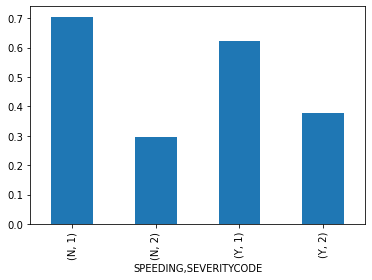

In [44]:
df_speed_norm.plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='SPEEDING', ylabel='count'>

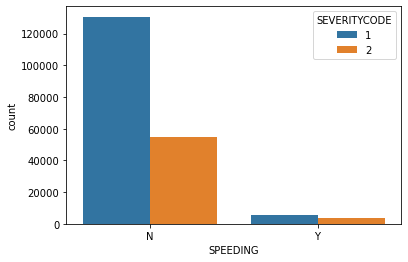

In [45]:
sns.countplot(x='SPEEDING', hue='SEVERITYCODE',data=df,order=df['SPEEDING'].value_counts().index)

With only 9,333 accidents reflecting speeding, we will need to update 'Nan' to 'N', so all accidents will be taken into account.

Speed appears to have a higher likelihood of involving injury when compared to the baseline - 37.8%</i>

### Road Conditions

In [46]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [47]:
# Replace NaN with "Unknown"
df['ROADCOND'].replace(np.nan, 'Unknown', inplace=True)
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            20090
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [48]:
df_cond = df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts()
df_cond

ROADCOND        SEVERITYCODE
Dry             1               84446
                2               40064
Ice             1                 936
                2                 273
Oil             1                  40
                2                  24
Other           1                  89
                2                  43
Sand/Mud/Dirt   1                  52
                2                  23
Snow/Slush      1                 837
                2                 167
Standing Water  1                  85
                2                  30
Unknown         1               18281
                2                1809
Wet             1               31719
                2               15755
Name: SEVERITYCODE, dtype: int64

In [49]:
df_cond_norm = df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize = True)
df_cond_norm

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.909955
                2               0.090045
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

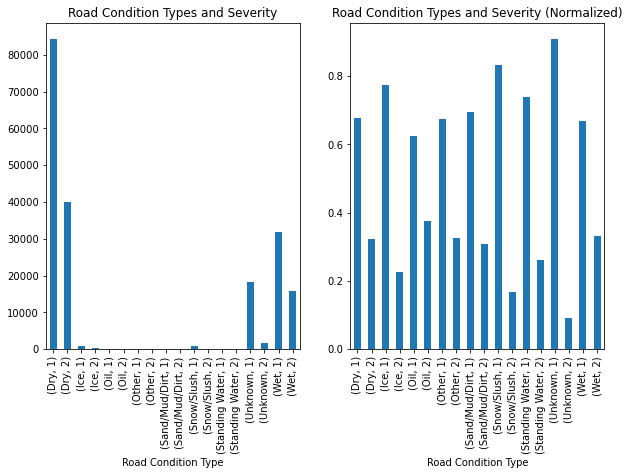

In [50]:
fig_conditions = plt.figure() # create figure

ax_cond = fig_conditions.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_cond_norm = fig_conditions.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

df_cond.plot(kind='bar', figsize = (10,6), ax=ax_cond) # add to subplot 1
ax_cond.set_title('Road Condition Types and Severity')
ax_cond.set_xlabel('Road Condition Type')


df_cond_norm.plot(kind='bar', figsize = (10,6), ax=ax_cond_norm) # add to subplot 1
ax_cond_norm.set_title('Road Condition Types and Severity (Normalized)')
ax_cond_norm.set_xlabel('Road Condition Type')

plt.show()

<AxesSubplot:xlabel='ROADCOND', ylabel='count'>

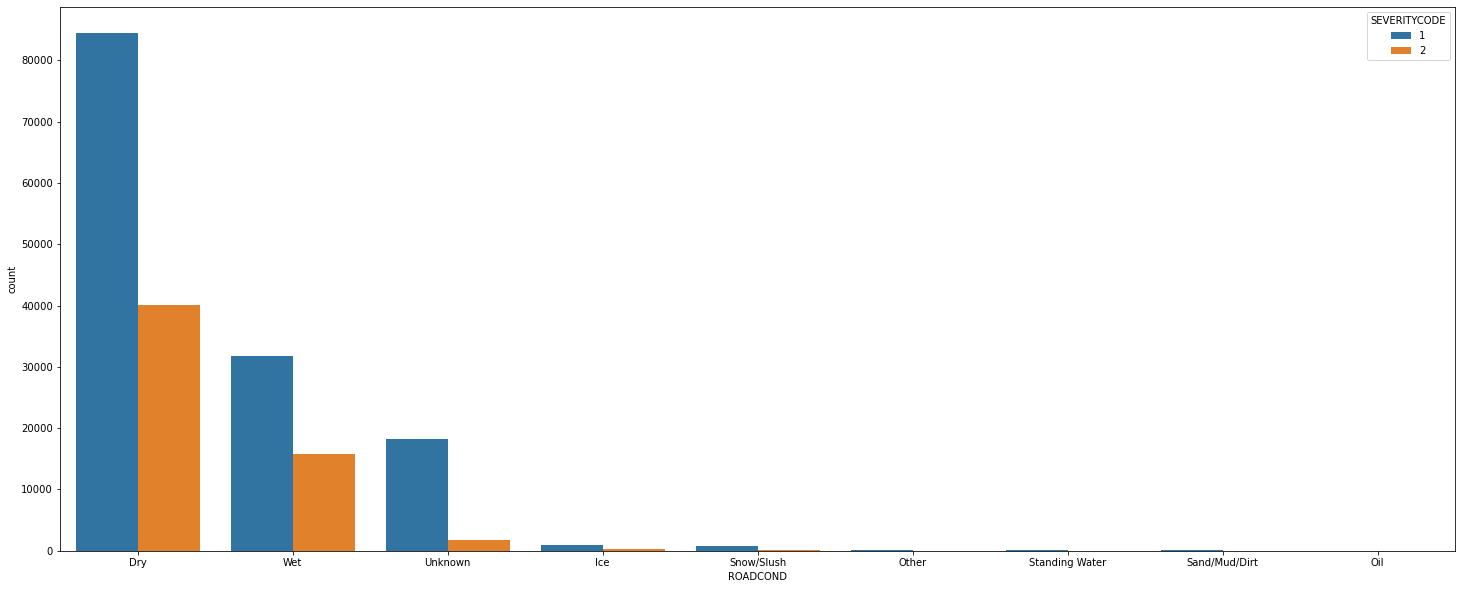

In [51]:
f, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x='ROADCOND', hue='SEVERITYCODE',data=df,order=df['ROADCOND'].value_counts().index)

Road conditions appear to have similar results to weather. Worse road conditions may result in different driving habits which may have higher probability of property damage, but with more careful driving, may minimize the injury risks.

### Inattention

Whether or not collision was due to inattention. (Y/N)

In [52]:
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [53]:
# Replace NaN with "N"
df['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)
df['INATTENTIONIND'].value_counts()

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

In [54]:
df_attention = df.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts()
df_attention

INATTENTIONIND  SEVERITYCODE
N               1               117077
                2                47791
Y               1                19408
                2                10397
Name: SEVERITYCODE, dtype: int64

In [55]:
df_attention_norm = df.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts(normalize = True)
df_attention_norm

INATTENTIONIND  SEVERITYCODE
N               1               0.710126
                2               0.289874
Y               1               0.651166
                2               0.348834
Name: SEVERITYCODE, dtype: float64

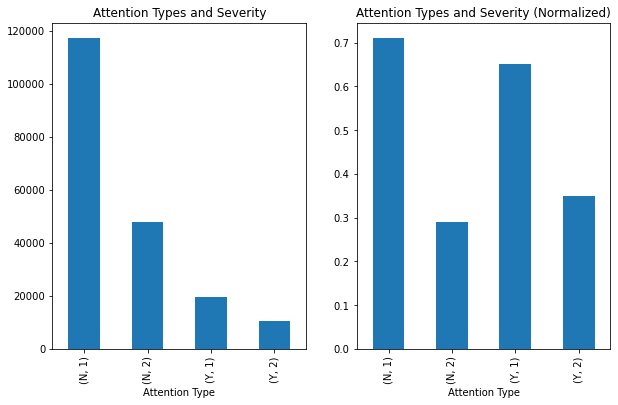

In [56]:
fig_attention = plt.figure() # create figure

ax_attention = fig_attention.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_attention_norm = fig_attention.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

df_attention.plot(kind='bar', figsize = (10,6), ax=ax_attention) # add to subplot 1
ax_attention.set_title('Attention Types and Severity')
ax_attention.set_xlabel('Attention Type')


df_attention_norm.plot(kind='bar', figsize = (10,6), ax=ax_attention_norm) # add to subplot 1
ax_attention_norm.set_title('Attention Types and Severity (Normalized)')
ax_attention_norm.set_xlabel('Attention Type')

plt.show()

<AxesSubplot:xlabel='INATTENTIONIND', ylabel='count'>

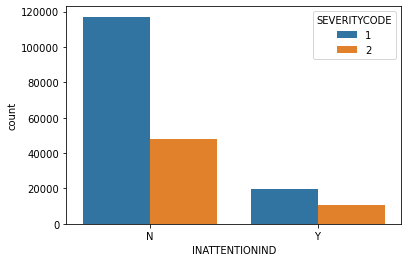

In [57]:
sns.countplot(x='INATTENTIONIND', hue='SEVERITYCODE',data=df,order=df['INATTENTIONIND'].value_counts().index)

With only 29,805 accidents reflecting 'inattention,' we will need to update 'Nan' to 'N', so all accidents will be taken into account.

Inattention has a higher percentage of injury than the baseline.

### Hit parked car
 
Whether or not the collision involved hitting a parked car. (Y/N)

In [58]:
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [59]:
df_parked = df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts()
df_parked

HITPARKEDCAR  SEVERITYCODE
N             1               129717
              2                57740
Y             1                 6768
              2                  448
Name: SEVERITYCODE, dtype: int64

In [60]:
df_parked_norm = df.groupby(['HITPARKEDCAR'])['SEVERITYCODE'].value_counts(normalize = True)
df_parked_norm

HITPARKEDCAR  SEVERITYCODE
N             1               0.691983
              2               0.308017
Y             1               0.937916
              2               0.062084
Name: SEVERITYCODE, dtype: float64

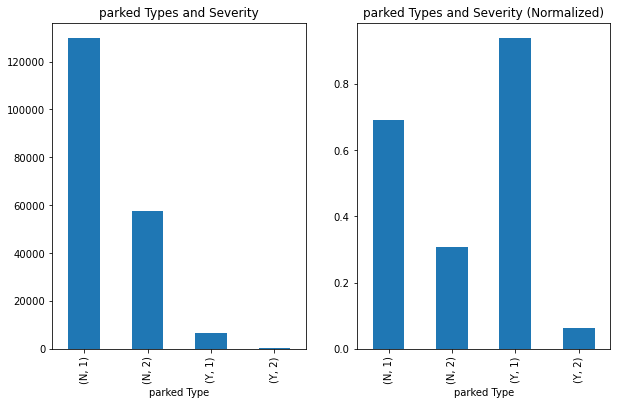

In [61]:
fig_parked = plt.figure() # create figure

ax_parked = fig_parked.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax_parked_norm = fig_parked.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

df_parked.plot(kind='bar', figsize = (10,6), ax=ax_parked) # add to subplot 1
ax_parked.set_title('parked Types and Severity')
ax_parked.set_xlabel('parked Type')


df_parked_norm.plot(kind='bar', figsize = (10,6), ax=ax_parked_norm) # add to subplot 1
ax_parked_norm.set_title('parked Types and Severity (Normalized)')
ax_parked_norm.set_xlabel('parked Type')

plt.show()

<AxesSubplot:xlabel='HITPARKEDCAR', ylabel='count'>

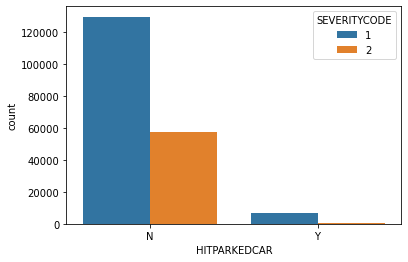

In [62]:
sns.countplot(x='HITPARKEDCAR', hue='SEVERITYCODE',data=df,order=df['HITPARKEDCAR'].value_counts().index)

Hitting a parked car results in only property damage 93.8% of the time. Not hitting a parked car follows the baseline.


<h2>5. Final Feature Selection for Modeling<h2>

In [63]:
df1 = df[['SEVERITYCODE','COLLISIONTYPE','JUNCTIONTYPE','SPEEDING','INATTENTIONIND','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']]

In [64]:
df1.head()

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,SPEEDING,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Angles,At Intersection (intersection related),N,N,Overcast,Wet,Daylight,N
1,1,Sideswipe,Mid-Block (not related to intersection),N,N,Raining,Wet,Dark - Street Lights On,N
2,1,Parked Car,Mid-Block (not related to intersection),N,N,Overcast,Dry,Daylight,N
3,1,Other,Mid-Block (not related to intersection),N,N,Clear,Dry,Daylight,N
4,2,Angles,At Intersection (intersection related),N,N,Raining,Wet,Daylight,N


In [65]:
y = df1['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [66]:

df1['ROADCOND'].replace(to_replace=['Other','Unknown','Dry','Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'],value=[0,0,1,2,3,3,3,2,2],inplace=True)
df1['WEATHER'].replace(to_replace=['Other','Unknown','Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],value=[0,0,1,3,2,3,3,3,3,3,2],inplace=True)
df1['LIGHTCOND'].replace(to_replace=['Other','Unknown','Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'],value=[0,0,1,3,2,2,4,4,4],inplace=True)
from sklearn.preprocessing import LabelEncoder
#creating an instance of labelencoder
labelencoder = LabelEncoder()
#assigning numerical values
df1[['COLLISIONTYPE']] = labelencoder.fit_transform(df[['COLLISIONTYPE']])
df1[['JUNCTIONTYPE']] = labelencoder.fit_transform(df[['JUNCTIONTYPE']])
df1[['SPEEDING']] = labelencoder.fit_transform(df[['SPEEDING']])
df1[['INATTENTIONIND']] = labelencoder.fit_transform(df[['INATTENTIONIND']])
df1[['HITPARKEDCAR']] = labelencoder.fit_transform(df[['HITPARKEDCAR']])
#Display DataFrame
df1.head()

/Users/toshiniagrawal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/Users/toshiniagrawal/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-66-bbc676b9ac3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['COLLISIONTYPE']] = labelencode

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,SPEEDING,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,0,1,0,0,2,2,1,0
1,1,9,4,0,0,3,2,3,0
2,1,5,4,0,0,2,1,1,0
3,1,4,4,0,0,1,1,1,0
4,2,0,1,0,0,3,2,1,0


### Normalize the dataset

In [67]:
X = df1[['COLLISIONTYPE','JUNCTIONTYPE','SPEEDING','INATTENTIONIND','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']]
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.61169444, -1.24091477, -0.22440165, -0.42518348,  0.67460162,
         1.37486154, -0.48048128, -0.19619929],
       [ 1.51276535,  0.79534134, -0.22440165, -0.42518348,  1.78445492,
         1.37486154,  1.49326309, -0.19619929],
       [ 0.12411655,  0.79534134, -0.22440165, -0.42518348,  0.67460162,
        -0.27092954, -0.48048128, -0.19619929],
       [-0.22304564,  0.79534134, -0.22440165, -0.42518348, -0.43525168,
        -0.27092954, -0.48048128, -0.19619929],
       [-1.61169444, -1.24091477, -0.22440165, -0.42518348,  1.78445492,
         1.37486154, -0.48048128, -0.19619929]])

## Methodology

## Analysis

<h3>Train/Test Split<h3>

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 8) (155738,)
Test set: (38935, 8) (38935,)


<h3>Decision Tree<h3>

In [69]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Tree.fit(X_train,y_train)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [70]:
#Train Model and Predict
DTyhat=Tree.predict(X_test)
print(DTyhat[0:5])
print(y_test[0:5])

[1 2 1 1 1]
[2 1 1 2 2]


In [71]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, DTyhat))

DecisionTrees's Accuracy:  0.738512906125594


In [72]:
from sklearn.metrics import classification_report
print (classification_report(y_test, DTyhat))

              precision    recall  f1-score   support

           1       0.76      0.93      0.83     27425
           2       0.62      0.29      0.40     11510

    accuracy                           0.74     38935
   macro avg       0.69      0.61      0.61     38935
weighted avg       0.72      0.74      0.70     38935



In [73]:
from six import StringIO
#from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

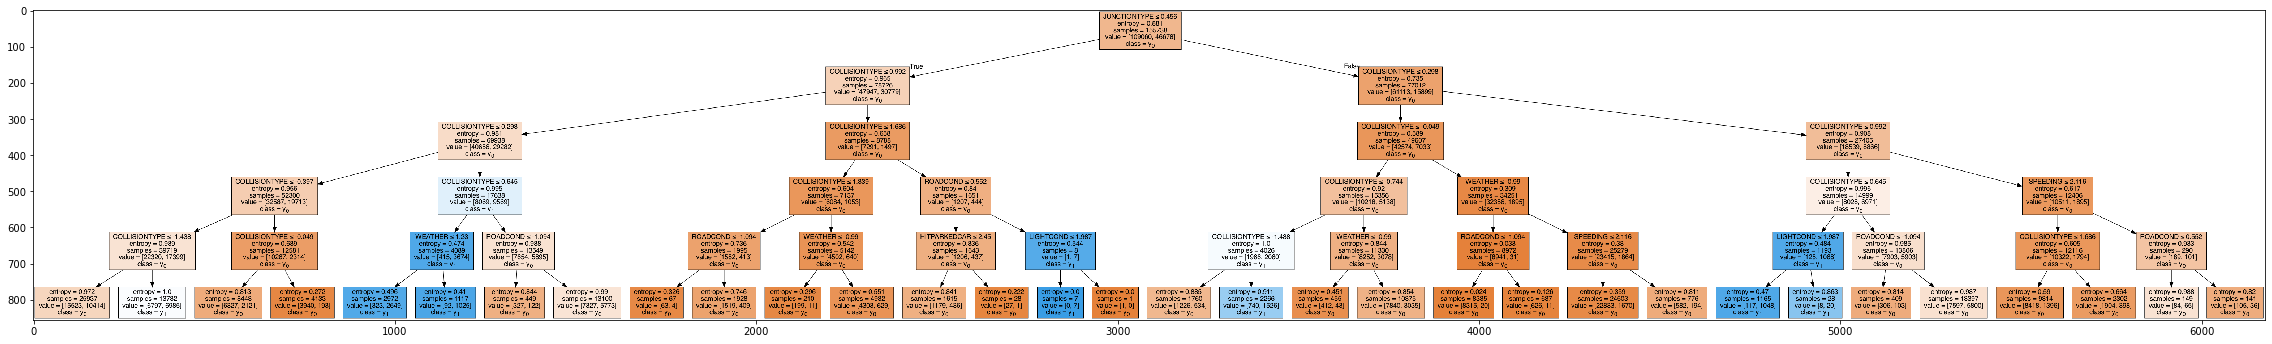

In [74]:
dot_data = StringIO()
filename = "accidenttree.png"
featureNames = df1.columns[1:9]
targetNames = df1["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames,out_file=dot_data,class_names=True,filled=True,special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
plt.figure(figsize=(40, 40))
img = mpimg.imread(filename)
plt.imshow(img,interpolation='nearest')

<h3>KNN<h3>

After balancing SEVERITYCODE feature, and standardizing the input feature, the data has been ready for building machine learning models. I have employed three machine learning models: K Nearest Neighbour (KNN) Decision Tree Linear Regression After importing necessary packages and splitting preprocessed data into test and train sets, for each machine learning model, I have built and evaluated the model and shown the results as follow:

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

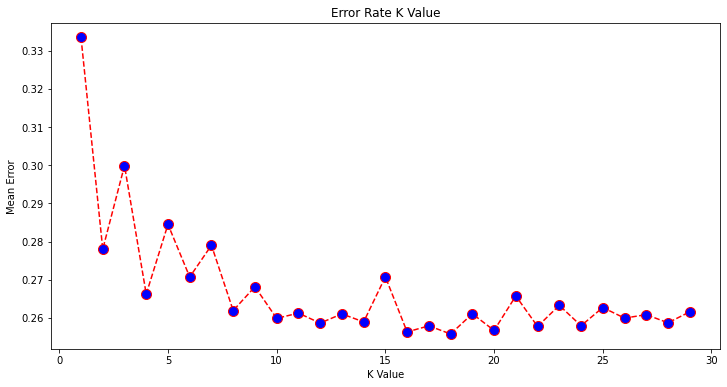

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [111]:
k = 18
knn=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn_y_pred=knn.predict(X_test)
knn_y_pred[0:5]

array([1, 1, 1, 1, 1])

In [112]:
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, knn_y_pred))

KNN's Accuracy:  0.7442147168357519


In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
print(confusion_matrix(y_test,knn_y_pred))
print(classification_report(y_test,knn_y_pred))

[[26332  1093]
 [ 8866  2644]]
              precision    recall  f1-score   support

           1       0.75      0.96      0.84     27425
           2       0.71      0.23      0.35     11510

    accuracy                           0.74     38935
   macro avg       0.73      0.59      0.59     38935
weighted avg       0.74      0.74      0.69     38935



<h3>Linear Regression<h3>


In [119]:
#Building the LR Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=6,solver="liblinear").fit(X_train,y_train)
LR

LogisticRegression(C=6, solver='liblinear')

In [102]:
#Train Model and predict
LRyhat=LR.predict(X_test)
LRyhat

array([1, 1, 1, ..., 1, 1, 1])

In [112]:
print("LinearRegression's Accuracy: ", metrics.accuracy_score(y_test, LRyhat))

LinearRegression's Accuracy:  0.6999101065879029


In [113]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob

array([[0.77291463, 0.22708537],
       [0.55195901, 0.44804099],
       [0.9301417 , 0.0698583 ],
       ...,
       [0.67045881, 0.32954119],
       [0.86975375, 0.13024625],
       [0.67849081, 0.32150919]])

In [114]:
print(confusion_matrix(y_test,LRyhat))
print(classification_report(y_test,LRyhat))

[[26686   739]
 [10945   565]]
              precision    recall  f1-score   support

           1       0.71      0.97      0.82     27425
           2       0.43      0.05      0.09     11510

    accuracy                           0.70     38935
   macro avg       0.57      0.51      0.45     38935
weighted avg       0.63      0.70      0.60     38935



<h3>Random Forest<h3>

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [107]:
rfc

RandomForestClassifier()

In [108]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
print("RandomForest's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

RandomForest's Accuracy:  0.7506356748426866


In [110]:
from sklearn.metrics import classification_report

In [111]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[26367  1058]
 [ 8651  2859]]
              precision    recall  f1-score   support

           1       0.75      0.96      0.84     27425
           2       0.73      0.25      0.37     11510

    accuracy                           0.75     38935
   macro avg       0.74      0.60      0.61     38935
weighted avg       0.75      0.75      0.70     38935



In [117]:
import pandas as pd
data = [['KNN',0.7442,0.84],['Decision Tree',0.7385,0.83],['Linear Regresion',0.6999,0.82],['Random Forest',0.7506,0.84]]
df = pd.DataFrame(data,columns=['Mode','Accuracy','F1 Score'])
print(df)

               Mode  Accuracy  F1 Score
0               KNN    0.7442      0.84
1     Decision Tree    0.7385      0.83
2  Linear Regresion    0.6999      0.82
3     Random Forest    0.7506      0.84


Based on the above table, Random Forest is the best model to predict car accident severity. Despite that, KNN is better as Random forest is comaparatively slower and less intrepretable than KNN . 